In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df= pd.read_csv('train.csv')

In [2]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df.shape

(8693, 14)

In [4]:
df= df.drop('PassengerId', axis=1)

In [5]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.isnull().sum()


HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
100 * df.isnull().sum()/ df.shape[0]

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

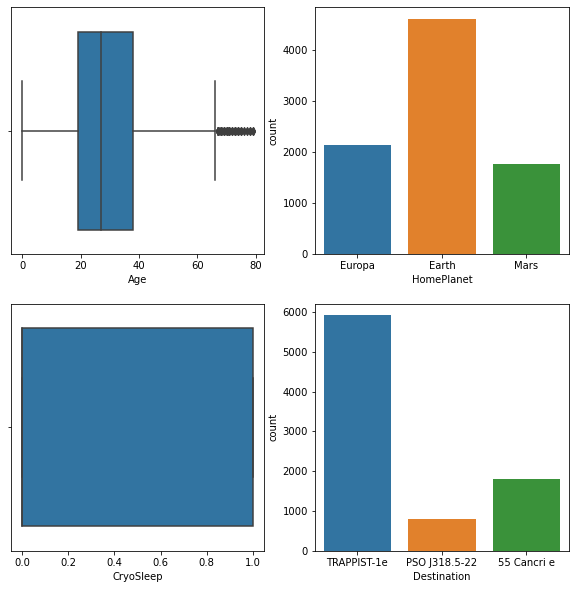

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)

sns.boxplot(x= 'Age', data= df, ax= plt.subplot(2,2,1))
sns.countplot('HomePlanet', data=df, ax= plt.subplot(2,2,2))
sns.boxplot('CryoSleep', data=df, ax=plt.subplot(2,2,3))
sns.countplot('Destination', data= df, ax= plt.subplot(2,2,4))

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

si= SimpleImputer(strategy='most_frequent')

columns= df.columns

cat_features= [column for column in columns if df[column].dtype== 'O' and len(df[column].unique()) > 20]
discrete_features= [column for column in columns if df[column].dtype in ['int64', 'float64'] and len(df[column].unique())<5]
continous_features= [column for column in columns if df[column].dtype in ['int64', 'float64'] and len(df[column].unique())>20]

df=si.fit_transform(df.values)

In [11]:
df= pd.DataFrame(df, columns= columns)

In [12]:
df['Transported']= pd.get_dummies(df['Transported'], drop_first=True)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [13]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [14]:
df['VIP']= pd.get_dummies(df['VIP'], drop_first= True)
df['CryoSleep']= pd.get_dummies(df['CryoSleep'], drop_first= True)
r= pd.get_dummies(df['Destination'], drop_first= True )
df.head()
r.head()
df= pd.concat([df, r] ,axis=1)

df=df.drop('Destination', axis=1)
df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PSO J318.5-22,TRAPPIST-1e
0,Europa,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1
1,Earth,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,1
2,Europa,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1
3,Europa,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1
4,Earth,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,1


In [15]:
df= df.drop('Name', axis=1)

In [16]:
columns= df.columns

df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PSO J318.5-22,TRAPPIST-1e
0,Europa,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,Earth,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1
2,Europa,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,Europa,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,Earth,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,1


In [17]:
len(df.Cabin.unique())
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'PSO J318.5-22', 'TRAPPIST-1e'],
      dtype='object')

In [18]:
from category_encoders import MEstimateEncoder
from sklearn.model_selection import train_test_split, cross_val_score


me= MEstimateEncoder(m= 50)
X= df.loc[:, ['HomePlanet', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'PSO J318.5-22', 'TRAPPIST-1e']]
y= df.loc[:, ['Transported']]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2)

In [19]:
# X_train['Destination', 'Cabin', 'HomePlanet']= me.fit_transform(X_train['Destination', 'Cabin', 'HomePlanet'], y_train)

v= ['Cabin', 'HomePlanet']

for column in v:
    X_train[column]= me.fit_transform(X_train[column], y_train)
    X_test[column]= me.transform(X_test[column])


In [20]:
X_train

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PSO J318.5-22,TRAPPIST-1e
1098,0.656017,0,0.511062,46.0,0,0.0,7201.0,0.0,32.0,2587.0,0,0
396,0.425170,0,0.501659,10.0,0,0.0,0.0,0.0,0.0,0.0,0,0
7492,0.656017,0,0.501659,36.0,0,0.0,244.0,0.0,5432.0,2302.0,0,1
1120,0.425170,1,0.492194,1.0,0,0.0,0.0,0.0,0.0,0.0,0,1
5059,0.656017,0,0.491888,38.0,0,20.0,3960.0,153.0,280.0,1674.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6760,0.425170,1,0.511496,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0
5855,0.656017,0,0.501659,27.0,0,3.0,4654.0,0.0,657.0,214.0,0,1
419,0.656017,1,0.529930,43.0,0,0.0,0.0,0.0,0.0,0.0,0,1
3951,0.425170,1,0.520890,20.0,0,0.0,0.0,0.0,0.0,0.0,0,1


In [21]:
for column in v:
    print('min Value = {:.4f}, max Value ={:.4f}'.format(X_train[column].min(), X_train[column].max()))

min Value = 0.4646, max Value =0.5629
min Value = 0.4252, max Value =0.6560


In [26]:
from sklearn.ensemble import RandomForestClassifier



classifier= RandomForestClassifier(n_estimators= 500)
val = cross_val_score(classifier, X_train, y_train,cv=5)


val.mean()
classifier.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was pa

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
prediction= val.predict(X_test)

In [ ]:
print('Train Score: {:.3f} /n Test Score: {:3f}'.format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))



In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=300, eval_metric = "AUC", max_depth= 5)
cat.fit(X_train, y_train)

In [ ]:
print('Train Score: {:.3f} /n Test Score: {:3f}'.format(cat.score(X_train, y_train), cat.score(X_test, y_test)))



In [ ]:
from xgboost import XGBClassifier

xgb= XGBClassifier(learning_rate= 0.01)
xgb.fit(X_train.values, y_train.values)

In [ ]:
print('Train Score: {:.3f} /n Test Score: {:3f}'.format(xgb.score(X_train.values, y_train.values), xgb.score(X_test.values, y_test.values)))



In [ ]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,2)
sns.countplot('HomePlanet', hue= 'Transported', data= df, ax=1)
sns.countplot('Age', hue= 'Transported', data=df, ax=2)